In [1]:
import glob
import json
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

from enterprise_GWecc.Fe_stat import FeStat
from enterprise.pulsar import Pulsar
from matplotlib import pyplot as plt

In [2]:
%load_ext line_profiler

In [3]:
timdir = "pristine-ecw-2/"
pardir = "pristine-ecw-2/"

In [4]:
true_params = json.load(open("../simulations/gwecc_sims/true_gwecc_params_2.dat", 'r'))

In [5]:
gwtheta = np.arccos(true_params['cos_gwtheta'])
gwphi = true_params['gwphi']
log10_F = true_params['log10_F']
log10_M = true_params['log10_M']
e0 = true_params['e0']
log10_zc = true_params['log10_zc']

In [6]:
parfiles = sorted(glob.glob(pardir + "/*.par"))
timfiles = sorted(glob.glob(timdir + "/*.tim"))

In [7]:
psrs = [Pulsar(p,t) for p,t in zip(parfiles,timfiles)]

<ErrorbarContainer object of 3 artists>

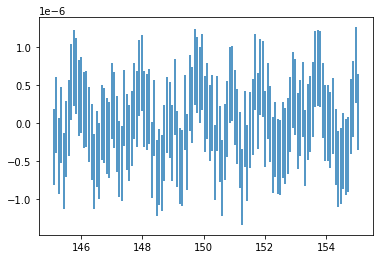

In [8]:
plt.errorbar(psrs[0].toas/3600/24/365.25, psrs[0].residuals, psrs[0].toaerrs, ls='')
plt.show()

In [9]:
noise_param_dict = {}
for psr in psrs:
    noise_param_dict.update({f"{psr.name}_efac": 1, f"{psr.name}_log10_t2equad": -19})

In [10]:
festat = FeStat(psrs, params=noise_param_dict)

Initializing the model...


In [11]:
NSIDE = 4
ipix = np.arange(hp.nside2npix(NSIDE))
gw_skyloc = np.array(hp.pix2ang(NSIDE, ipix))

In [12]:
tref = max([max(psr.toas) for psr in psrs])

In [13]:
%%time
fe = festat.compute_Fe(
    log10_F=log10_F,
    e0=e0,
    gw_skyloc=gw_skyloc,
    log10_M=log10_M,
    q=1,
    l0=0,
    tref=tref,
    log10_zc=log10_zc,
    zp=0,
    maximized_parameters=False,
)

CPU times: user 7min 52s, sys: 20min 50s, total: 28min 42s
Wall time: 3min 36s


In [16]:
#%prun festat.compute_Fe(log10_F=-8.97979798, e0=0.4, gw_skyloc=gw_skyloc, log10_M=9, q=1, l0=0, tref=tref, log10_zc=np.log10(0.2), zp=0, maximized_parameters=False,)

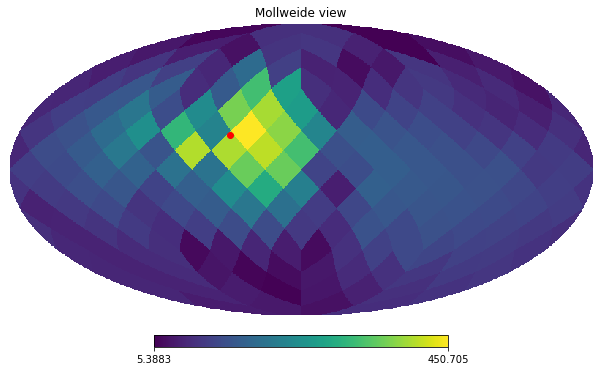

In [14]:
hp.mollview(fe)
hp.projscatter(gwtheta, gwphi, c='red')
plt.show()

In [27]:
fe = festat.compute_Fe(
    log10_F=log10_F,
    e0=e0,
    gw_skyloc=gw_skyloc[:,:1],
    log10_M=log10_M,
    q=1,
    l0=0,
    tref=tref,
    log10_zc=log10_zc,
    zp=0,
    maximized_parameters=False,
)

In [59]:
log10_zc

-4.5

In [60]:
log10_Fs = np.linspace(-9,-7,20)
#log10_zcs = np.linspace(-5,-1,20)
fes = []
for i,log10_F in enumerate(log10_Fs):
    fes.append(festat.compute_Fe(
                    log10_F=log10_F,
                    e0=e0,
                    gw_skyloc=np.array([[gwtheta], [gwphi]]),
                    log10_M=log10_M,
                    q=1,
                    l0=0,
                    tref=tref,
                    log10_zc=log10_zc,
                    zp=0,
                    maximized_parameters=False,
                ).item())

log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5
log10_zc=-4.5


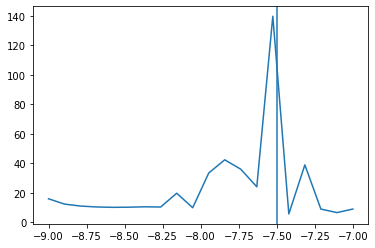

In [61]:
plt.plot(log10_Fs, fes)
plt.axvline(-7.5)
plt.show()

In [63]:
log10_zcs = np.linspace(-5,-1,20)
fes = []
for i,log10_zc in enumerate(log10_zcs):
    fes.append(festat.compute_Fe(
                    log10_F=log10_F,
                    e0=e0,
                    gw_skyloc=np.array([[gwtheta], [gwphi]]),
                    log10_M=log10_M,
                    q=1,
                    l0=0,
                    tref=tref,
                    log10_zc=log10_zc,
                    zp=0,
                    maximized_parameters=False,
                ).item())

log10_zc=-5.0
log10_zc=-4.7894736842105265
log10_zc=-4.578947368421053
log10_zc=-4.368421052631579
log10_zc=-4.157894736842105
log10_zc=-3.947368421052632
log10_zc=-3.736842105263158
log10_zc=-3.526315789473684
log10_zc=-3.3157894736842106
log10_zc=-3.105263157894737
log10_zc=-2.8947368421052633
log10_zc=-2.6842105263157894
log10_zc=-2.473684210526316
log10_zc=-2.2631578947368425
log10_zc=-2.0526315789473686
log10_zc=-1.8421052631578947
log10_zc=-1.6315789473684212
log10_zc=-1.4210526315789478
log10_zc=-1.210526315789474
log10_zc=-1.0


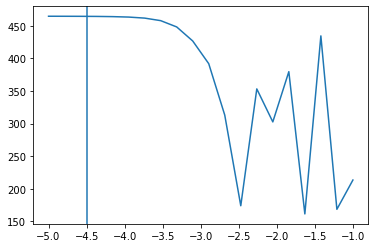

In [64]:
plt.plot(log10_zcs, fes)
plt.axvline(-4.5)
plt.show()